In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
print(list(pd.read_csv('../data/samples/imsi_filtered.csv').imsi[:100].values))

[56226218465, 93516790565, 85244412565, 49765388465, 49379818465, 72965878465, 17317035565, 15533918465, 80289560865, 38408722765, 2795288465, 26030718465, 79061690565, 30736438156, 44856771865, 61228165565, 94562790565, 10106271865, 26386865565, 78846090565, 10501181865, 31836971865, 16569799765, 96109722765, 86392290565, 82542880565, 12066636565, 96856880565, 53116388465, 74563690565, 97363681565, 79403763665, 27504022565, 53069069865, 64962090565, 44493853665, 57410118465, 94681090565, 46448460865, 18207790565, 82193000865, 75411028465, 98519412565, 65183000865, 77169293765, 8447117465, 68866898365, 79127532765, 12684438156, 98165980565, 92503561865, 21812753665, 63071202565, 83153718465, 20392181865, 92159138465, 44476560865, 3168238465, 54591622865, 59110638156, 2404971865, 28714880565, 84520090565, 46590922765, 49821160865, 39021090565, 64564638156, 91607417465, 52052000865, 23186328465, 91640665565, 97602118465, 39105138465, 72934290565, 2061690565, 15710707185, 56583181865, 749

In [20]:
imsi_counts = pd.read_csv('../data/samples/imsi_counts.csv')
checked_imsi = pd.read_csv('../data/samples/checked_imsi.csv')

In [18]:
print(f'Number of users: {imsi_counts.shape[0]:,d}')
print(f'Number of records: {imsi_counts.total_records.sum():,d}')

Number of users: 1,799,977
Number of records: 16,826,157,036


In [16]:
imsi_filtered = imsi_counts[(imsi_counts.days_recorded>=7)&(imsi_counts.total_records>=50)].copy()
imsi_filtered = imsi_filtered[imsi_filtered.total_records<=imsi_filtered.total_records.quantile(0.99)]

In [17]:
print('Number of users with less then 7 days recorded or less then 50 records: {:,d}'.format(imsi_counts.shape[0]-imsi_filtered.shape[0]))
print('Number of records removed: {:,d}\n'.format(imsi_counts.total_records.sum()-imsi_filtered.total_records.sum()))

print('Number of remaining users: {:,d}'.format(imsi_filtered.total_records.shape[0]))
print('Number of remaining records: {:,d}'.format(imsi_filtered.total_records.sum()))

Number of users with less then 7 days recorded or less then 50 records: 813,980
Number of records removed: 1,922,333,558

Number of remaining users: 985,997
Number of remaining records: 14,903,823,478


In [78]:
imsi_filtered = pd.read_csv('../data/samples/imsi_filtered.csv')

(0, 100000)

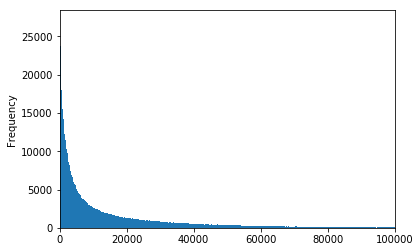

In [30]:
imsi_filtered.total_records.plot.hist(bins=1000)
plt.xlim([0,100000])

In [30]:
home_data = pd.read_csv('../../Data/new samples/home area/home_area_data_all.csv')
home_data.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
home_data2 =  pd.read_csv('../../Data/new samples/home area/home_stat_area_data_sample100M.csv')
home_data3 =  pd.read_csv('../../Data/new samples/home area/home_stat_area_data_sample2_100M.csv')


In [38]:
home_data_all = pd.concat([home_data, home_data2, home_data3])
home_data_all.to_csv('../../Data/new samples/home area/home_area_data_all_updated.csv', index=False)

In [42]:
home_dataaaa = pd.read_csv('../../Data/new samples/home area/home_area_data_all_updated.csv')

In [51]:
xx = home_dataaaa[home_dataaaa.home_stat_area != 'NotDetermined'].imsi
xx.size

173394

In [53]:
imsi_counts[imsi_counts.imsi.isin(xx)].total_records.sum()

3042554294

In [61]:
# imsi_filtered.to_csv('./data/imsi_filtered.csv', index=False)

In [6]:
imsi_filtered = pd.read_csv('./data/imsi_filtered.csv')

In [7]:
loc_data = pd.read_csv('./data/samples/sample_200M.csv')

In [12]:
uni_imsi = loc_data.imsi.unique()

In [14]:
uni_imsi.size

20998

In [23]:
imsi_filtered = imsi_filtered[~imsi_filtered.imsi.isin(uni_imsi)]

In [25]:
# imsi_filtered.to_csv('./data/imsi_filtered.csv', index=False)

In [37]:
checked_imsi = imsi_filtered[imsi_filtered.imsi.isin(uni_imsi)].copy()
checked_imsi.to_csv('./data/checked_imsi.csv', index=False)

In [40]:
imsi_filtered.shape

(985997, 3)

In [41]:
checked_imsi.shape

(11463, 3)

In [45]:
pd.concat([checked_imsi, checked_imsi])

,imsi,days_recorded,total_records
0,81308790565,15,2215
158,54603388465,46,1834
427,49526999765,32,13169
450,2928898365,10,855
884,36516690565,34,22719
1150,88101790565,34,13085
1155,12817252765,29,3348
1457,25954790565,47,78734
1506,53527971865,16,1202
1513,16417718465,23,824
